## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
study_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# number of mice
number_of_mice=study_complete_df["Mouse ID"].nunique()
number_of_mice

249

In [15]:

duplicate_ID = study_complete_df.loc[study_complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 



In [17]:
# dropping duplicate mouse by its ID
clean_mouse_df = study_complete_df[study_complete_df['Mouse ID'].isin(duplicate_ID)==False]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean=clean_mouse_df["Mouse ID"].nunique()
number_of_mice_clean

248

## Summary Statistics

In [19]:
# Summary statistics table mean, median, variance, standard deviation, SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate properties of each drug regimen: 
# mean, median, variance, standard deviation, SEM of the tumor volume
# Assemble resulting series into single summary dataframe

mean=clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).mean()

median=clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).median()

var=clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).var()

std=clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).std()

sem=clean_mouse_df["Tumor Volume (mm3)"].groupby(clean_mouse_df["Drug Regimen"]).sem()



summary_statistics = pd.DataFrame(
                    
                            {"Mean Tumor Volume":mean, 
                             "Median Tumor Volume":median, 
                            "Tumor Volume Variance":var, 
                           "Tumor Volume Standard deviation":std, 
                           "Tumor Volume SEM":sem}
)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Using the aggregation method, produce the same summary statistics in a single line

Aggregated =clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Aggregated


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [21]:
# bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
#ie use the 'Drug Regimen' column , counting the number of data points for each Drug Regimen 
total_timepoints = clean_mouse_df["Drug Regimen"].value_counts()
total_timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Total number of timepoints for all mice tested for each drug regimen')

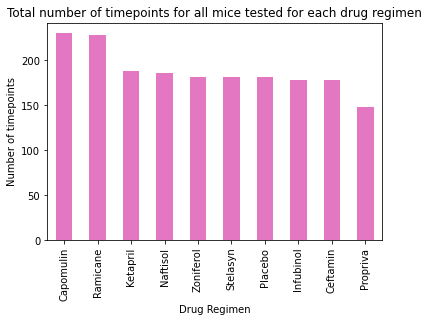

In [22]:
# bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

plot_pandas = total_timepoints.plot.bar(color='tab:pink')  
# Set  xlabel, ylabel,  title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints")
plt.title("Total number of timepoints for all mice tested for each drug regimen")


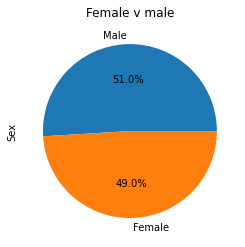

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = clean_mouse_df["Sex"].value_counts()
plt.title("Female v male")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


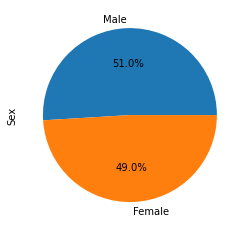

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
#final tumor volume of each mouse across four of the treatment regimen
# Capomulin, Ramicane, Infubinol, and Ceftamin


Capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [43]:
    
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")

print(f"The upper quartile of Capomulin tumors: {upperq}")

print(f"The interquartile range of Capomulin tumors: {iqr}")

print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint





## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatmeant of mouse l509')

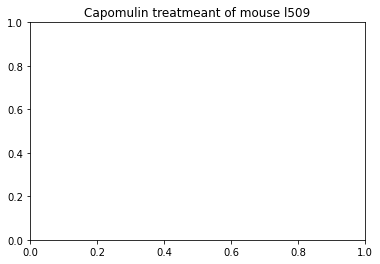

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = line_plot_df["Timepoint"]
size = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

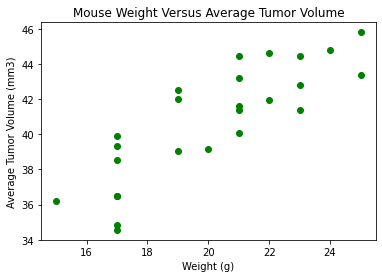

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
average_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(average_vol['Weight (g)'],average_vol['Tumor Volume (mm3)'], color="green")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [51]:
# Calculate correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_vol['Weight (g)'],average_vol['Tumor Volume (mm3)'])


In [31]:
from scipy.stats import linregress
